<a href="https://colab.research.google.com/github/UnsignedArduino/Chessbot/blob/main/src/train/train_piece_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i"  # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-pieces-qxp5p"  # @param {"type":"string"}
DATASET_VERSION = 5  # @param {"type":"integer","placeholder":"1, 2, 3..."}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(DATASET_VERSION)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...
Exporting format folder in progress : 85.0%
Version export complete for folder format



Extracting Dataset Version Zip to Chessbot-Pieces-5 in folder:: 100%|██████████| 8591/8591 [00:01<00:00, 8488.10it/s]


In [3]:
from pathlib import Path
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

dset_path = Path(dataset.location)

results = model.train(data=dset_path, epochs=200, imgsz=64, plots=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 96.3MB/s]


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Chessbot-Pieces-5, epochs=200, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Chessbot-Pieces-5/train... 7476 images, 0 corrupt: 100%|██████████| 7476/7476 [00:01<00:00, 3895.34it/s]


train: New cache created: /content/Chessbot-Pieces-5/train.cache


val: Scanning /content/Chessbot-Pieces-5/test... 356 images, 0 corrupt: 100%|██████████| 356/356 [00:00<00:00, 1444.85it/s]

val: New cache created: /content/Chessbot-Pieces-5/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200     0.149G      3.152         16         64:   2%|▏         | 10/468 [00:01<00:41, 11.04it/s]

      1/200     0.149G      3.134         16         64:   5%|▍         | 22/468 [00:02<00:28, 15.76it/s]
100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]
      1/200     0.151G      1.282          4         64: 100%|██████████| 468/468 [00:32<00:00, 14.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 38.50it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      2/200     0.143G     0.6206          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.18it/s]

                   all       0.91      0.994



      Epoch    GPU_mem       loss  Instances       Size


      3/200     0.141G     0.7484          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.92it/s]

                   all      0.919      0.989



      Epoch    GPU_mem       loss  Instances       Size


      4/200     0.141G      1.114          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.53it/s]

                   all       0.91      0.994



      Epoch    GPU_mem       loss  Instances       Size


      5/200     0.141G      1.187          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 41.35it/s]

                   all      0.941      0.994



      Epoch    GPU_mem       loss  Instances       Size


      6/200     0.141G     0.8375          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 32.98it/s]

                   all      0.935      0.992



      Epoch    GPU_mem       loss  Instances       Size


      7/200     0.141G     0.7372          4         64: 100%|██████████| 468/468 [00:26<00:00, 17.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.40it/s]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200     0.141G     0.6588          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.05it/s]

                   all      0.978      0.994



      Epoch    GPU_mem       loss  Instances       Size


      9/200     0.141G     0.5088          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.49it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200     0.141G     0.5127          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 23.02it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     11/200     0.141G     0.4485          4         64: 100%|██████████| 468/468 [00:26<00:00, 17.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 29.15it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200     0.141G     0.4105          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.48it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200     0.141G     0.3763          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.13it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200     0.141G     0.3527          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.03it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     15/200     0.141G     0.3382          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.80it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200     0.141G     0.3217          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.43it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200     0.141G     0.3031          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.33it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200     0.141G     0.2786          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.92it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200     0.141G     0.2949          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.00it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200     0.141G     0.2808          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.19it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200     0.141G     0.2699          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 31.34it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200     0.141G     0.2559          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.15it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200     0.141G     0.2532          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.48it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200     0.141G     0.2631          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.96it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     25/200     0.141G     0.2363          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.98it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     26/200     0.141G      0.229          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 31.79it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     27/200     0.141G     0.2282          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.32it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     28/200     0.141G     0.2308          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.36it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     29/200     0.141G     0.2263          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.81it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     30/200     0.141G     0.2265          4         64: 100%|██████████| 468/468 [00:31<00:00, 15.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.21it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     31/200     0.141G     0.2335          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.70it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     32/200     0.141G     0.2353          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 29.85it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     33/200     0.141G     0.2298          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.42it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     34/200     0.141G     0.2395          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.82it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     35/200     0.141G     0.2351          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 41.78it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     36/200     0.141G     0.2059          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.36it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     37/200     0.141G     0.2065          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.84it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     38/200     0.141G     0.1905          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.63it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     39/200     0.141G     0.2014          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.36it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     40/200     0.141G     0.1943          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.01it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     41/200     0.141G     0.1878          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.49it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     42/200     0.141G      0.193          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.37it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     43/200     0.141G     0.1904          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.92it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     44/200     0.141G     0.1884          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.83it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     45/200     0.141G      0.189          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.20it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     46/200     0.141G     0.1872          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.55it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     47/200     0.141G     0.1789          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.09it/s]


                   all      0.994          1

      Epoch    GPU_mem       loss  Instances       Size


     48/200     0.141G     0.1777          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 35.98it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     49/200     0.141G       0.17          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.14it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     50/200     0.141G     0.1676          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.52it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     51/200     0.141G     0.1854          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.31it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     52/200     0.141G     0.1684          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.54it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     53/200     0.141G     0.1601          4         64: 100%|██████████| 468/468 [00:26<00:00, 17.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 33.07it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     54/200     0.141G     0.1677          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.88it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     55/200     0.141G      0.169          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.48it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     56/200     0.141G     0.1582          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.70it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     57/200     0.141G     0.1523          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.33it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     58/200     0.141G     0.1586          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.45it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     59/200     0.141G     0.1688          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.98it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     60/200     0.141G     0.1579          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.56it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     61/200     0.141G     0.1582          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.56it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     62/200     0.141G     0.1625          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.03it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     63/200     0.141G     0.1696          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.49it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     64/200     0.141G     0.1599          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 25.74it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     65/200     0.141G     0.1616          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.55it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     66/200     0.141G     0.1586          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.39it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     67/200     0.141G     0.1516          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.30it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     68/200     0.141G     0.1612          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.10it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     69/200     0.141G     0.1405          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.33it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     70/200     0.141G     0.1464          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.28it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     71/200     0.141G     0.1478          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.48it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     72/200     0.141G      0.142          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.81it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     73/200     0.141G     0.1473          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.07it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     74/200     0.141G     0.1505          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.56it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     75/200     0.141G      0.135          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.19it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     76/200     0.141G      0.129          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.24it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     77/200     0.141G     0.1491          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.41it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     78/200     0.141G     0.1333          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.88it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     79/200     0.141G     0.1307          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.92it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     80/200     0.141G     0.1431          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.12it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     81/200     0.141G     0.1426          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.56it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     82/200     0.141G     0.1518          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.32it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     83/200     0.141G     0.1254          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 29.66it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     84/200     0.141G     0.1329          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 32.74it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     85/200     0.141G     0.1333          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.70it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     86/200     0.141G     0.1348          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.04it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     87/200     0.141G     0.1226          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 41.76it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     88/200     0.141G     0.1206          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.51it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     89/200     0.141G     0.1126          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.93it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     90/200     0.141G     0.1352          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.11it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     91/200     0.141G      0.117          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.92it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     92/200     0.141G     0.1236          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.85it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     93/200     0.141G     0.1292          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.34it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     94/200     0.141G     0.1259          4         64: 100%|██████████| 468/468 [00:26<00:00, 17.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.05it/s]


                   all      0.994          1

      Epoch    GPU_mem       loss  Instances       Size


     95/200     0.141G     0.1253          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.11it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     96/200     0.141G      0.118          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 51.18it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     97/200     0.141G     0.1264          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.47it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     98/200     0.141G     0.1116          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.94it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


     99/200     0.141G     0.1162          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.50it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    100/200     0.141G     0.1173          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.43it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    101/200     0.141G     0.1228          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.87it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    102/200     0.141G     0.1157          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.61it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    103/200     0.141G     0.1052          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.38it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    104/200     0.141G     0.1014          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.84it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    105/200     0.141G     0.1165          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.31it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    106/200     0.141G     0.1144          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.96it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    107/200     0.141G     0.1082          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.12it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    108/200     0.141G     0.1036          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.23it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    109/200     0.141G     0.1035          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.29it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    110/200     0.141G     0.1102          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.15it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    111/200     0.141G      0.109          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.46it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    112/200     0.141G     0.1057          4         64: 100%|██████████| 468/468 [00:26<00:00, 17.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 32.93it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    113/200     0.141G     0.1156          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.96it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    114/200     0.141G     0.1028          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.26it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    115/200     0.141G    0.09952          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.45it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    116/200     0.141G    0.09629          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.66it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    117/200     0.141G    0.09177          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.61it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    118/200     0.141G      0.102          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.58it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    119/200     0.141G    0.09409          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 51.18it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    120/200     0.141G    0.09022          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 31.23it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    121/200     0.141G     0.1005          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.31it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    122/200     0.141G    0.09063          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.42it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    123/200     0.141G    0.09847          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.00it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    124/200     0.141G    0.09652          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.97it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    125/200     0.141G    0.09058          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 32.46it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    126/200     0.141G    0.09796          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.32it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    127/200     0.141G    0.08589          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.81it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    128/200     0.141G    0.09234          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.52it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    129/200     0.141G    0.09862          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 25.91it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    130/200     0.141G    0.09022          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.53it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    131/200     0.141G    0.09661          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.26it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    132/200     0.141G    0.08432          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.00it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    133/200     0.141G    0.09611          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 51.54it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    134/200     0.141G     0.0881          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.68it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    135/200     0.141G     0.0914          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 32.35it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    136/200     0.141G    0.08015          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.40it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    137/200     0.141G    0.08832          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.27it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    138/200     0.141G      0.089          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.27it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    139/200     0.141G    0.09522          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 31.62it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    140/200     0.141G     0.0788          4         64: 100%|██████████| 468/468 [00:27<00:00, 17.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 29.79it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    141/200     0.141G    0.08286          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.70it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    142/200     0.141G    0.08417          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.60it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    143/200     0.141G      0.078          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.67it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    144/200     0.141G    0.08192          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 34.37it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    145/200     0.141G    0.08843          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.13it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    146/200     0.141G    0.07641          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.09it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    147/200     0.141G    0.07769          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 41.66it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    148/200     0.141G    0.07443          4         64: 100%|██████████| 468/468 [00:29<00:00, 16.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 29.21it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    149/200     0.141G    0.07156          4         64: 100%|██████████| 468/468 [00:27<00:00, 16.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 30.77it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    150/200     0.141G    0.07666          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.96it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    151/200     0.141G      0.074          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.04it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    152/200     0.141G    0.07504          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.09it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    153/200     0.141G    0.06596          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.73it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    154/200     0.141G    0.07353          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.00it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    155/200     0.141G    0.06678          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.61it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    156/200     0.141G    0.07108          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.12it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    157/200     0.141G    0.06402          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 49.28it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    158/200     0.141G    0.06695          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 43.59it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    159/200     0.141G    0.06957          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.34it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    160/200     0.141G    0.06446          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.49it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    161/200     0.141G    0.06975          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.12it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    162/200     0.141G    0.07012          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.79it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    163/200     0.141G    0.07444          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 44.15it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    164/200     0.141G     0.0614          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.77it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    165/200     0.141G    0.07011          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 28.02it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    166/200     0.141G     0.0648          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.75it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    167/200     0.141G    0.06068          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.63it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    168/200     0.141G    0.06032          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 50.73it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    169/200     0.141G    0.05274          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.79it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    170/200     0.141G    0.05418          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 31.05it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    171/200     0.141G    0.05773          4         64: 100%|██████████| 468/468 [00:28<00:00, 16.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 34.03it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    172/200     0.141G    0.06144          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.37it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    173/200     0.141G     0.0625          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.26it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    174/200     0.141G    0.05808          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 47.34it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    175/200     0.141G    0.06011          4         64: 100%|██████████| 468/468 [00:31<00:00, 15.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 40.19it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    176/200     0.141G    0.04907          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.13it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    177/200     0.141G    0.05808          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 26.56it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    178/200     0.141G    0.04803          4         64: 100%|██████████| 468/468 [00:29<00:00, 15.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 33.00it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    179/200     0.141G    0.05321          4         64: 100%|██████████| 468/468 [00:31<00:00, 15.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 46.17it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    180/200     0.141G    0.05048          4         64: 100%|██████████| 468/468 [00:31<00:00, 14.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 48.15it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    181/200     0.141G    0.05563          4         64: 100%|██████████| 468/468 [00:31<00:00, 15.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 42.79it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    182/200     0.141G    0.05043          4         64: 100%|██████████| 468/468 [00:31<00:00, 14.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 45.33it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    183/200     0.141G    0.05414          4         64: 100%|██████████| 468/468 [00:30<00:00, 15.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 25.30it/s]

                   all      0.994          1
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 83, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



183 epochs completed in 1.511 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,543,958 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Chessbot-Pieces-5/train... found 7476 images in 14 classes ✅ 
val: None...
test: /content/Chessbot-Pieces-5/test... found 356 images in 14 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 27.48it/s]


                   all      0.997          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


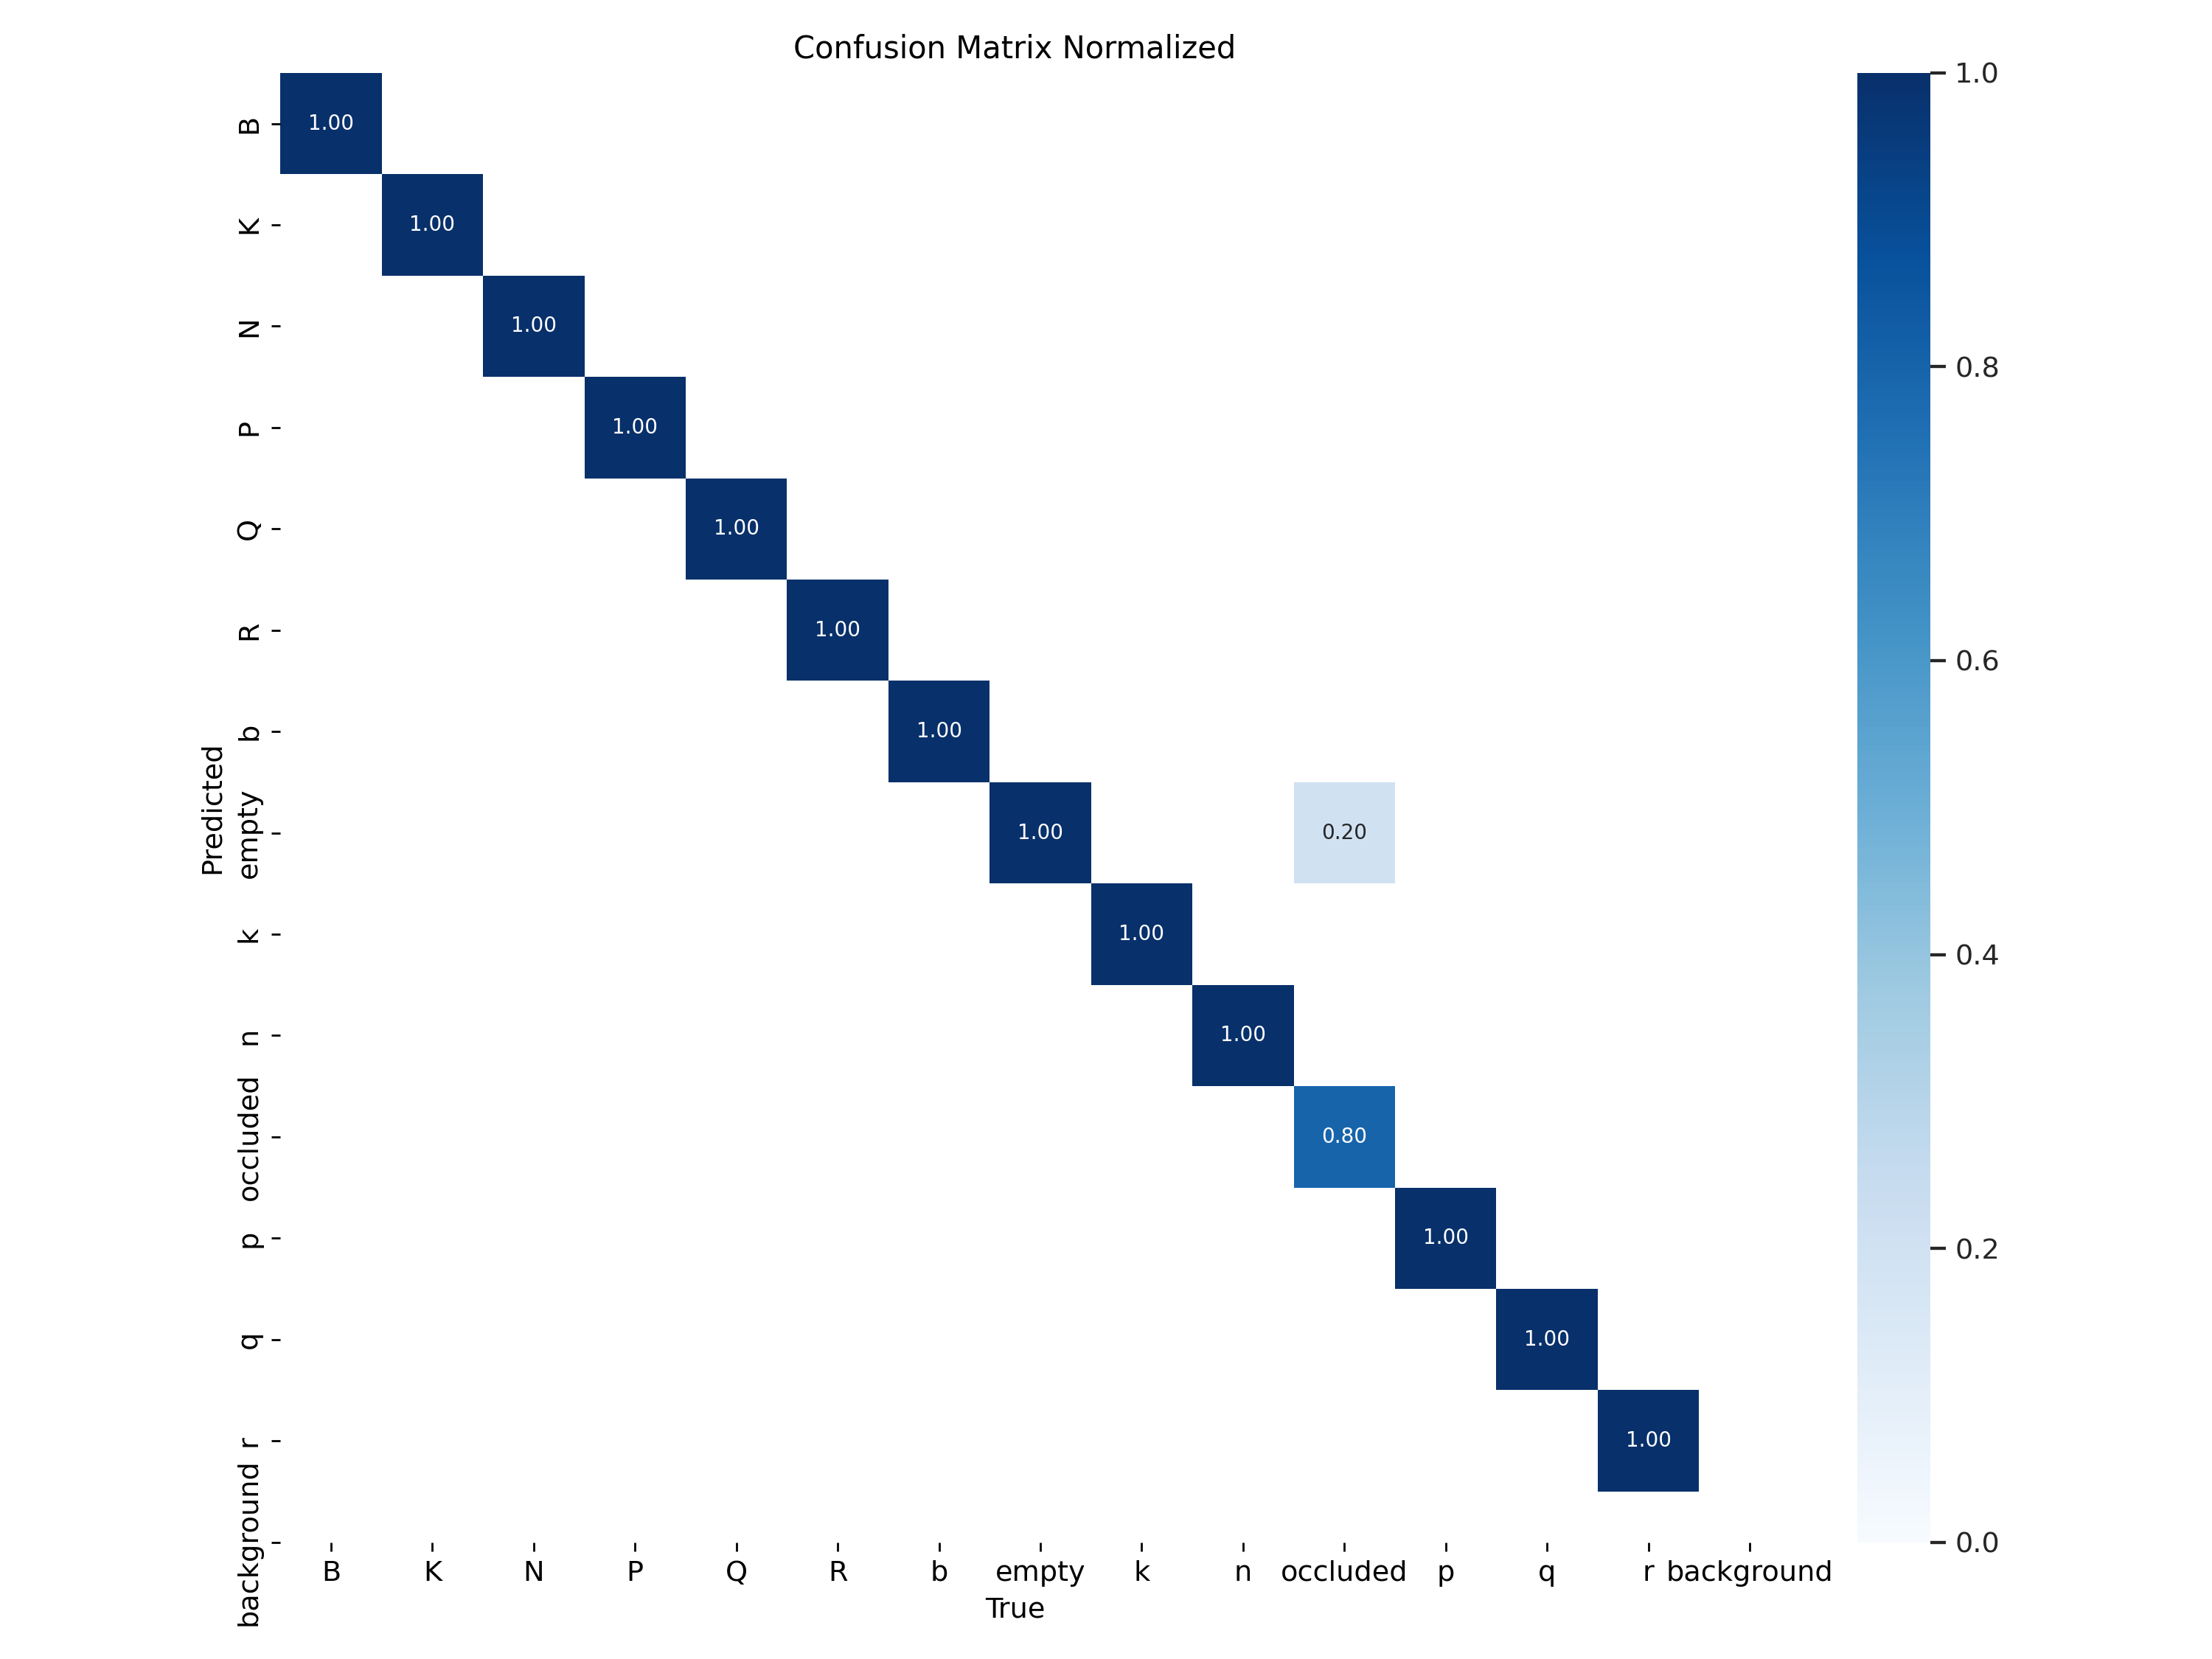

In [4]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/classify/train/confusion_matrix_normalized.png',
         width=600)

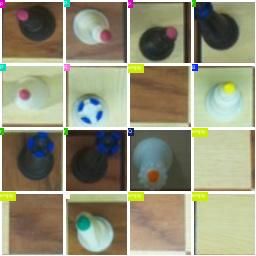

In [5]:
IPyImage(filename=f'runs/classify/train/val_batch0_pred.jpg', width=600)

In [ ]:
from google.colab import files

files.download("/content/runs/classify/train/weights/best.pt")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11",
                                        model_path=f"runs/classify/train")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/4
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/model/4
